In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data
data = pd.read_csv('/content/day.csv')

In [4]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
data.shape

(730, 16)

In [ ]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
data.info()

In [ ]:
data.isnull( ).sum() # no null values found

In [6]:
drop = ['instant','dteday'] # dropping unnecessary columns

In [7]:
data.drop(drop,inplace=True,axis=1)

In [ ]:
data.head()

Converting categorical variables available in numbers to string

In [8]:
data.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [9]:
def season(x):
  if x==1:
    return 'spring'
  elif x==2:
    return 'summer'
  elif x==3:
    return 'fall'
  else:
    return 'winter'

In [10]:
data['season']=data.season.apply(season) #seasons updated based on data dictionary

In [11]:
data.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [12]:
data.tail()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,spring,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,spring,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,spring,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,spring,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,spring,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [13]:
data.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [14]:
def month(x):
  return x.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',
                7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [15]:
data[['mnth']]=data[['mnth']].apply(month) #Updating month column to string

In [16]:
data.mnth.value_counts()

Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64

In [17]:
data.weekday.value_counts()

1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64

In [18]:
def week(x):
    return x.map({0:'sun', 1:'mon', 2:'tues',3:'wed', 4:'thurs', 5:'fri', 6:'sat'})

In [19]:
data[['weekday']]=data[['weekday']].apply(week)

In [ ]:
data.weekday.value_counts()

mon      105
tues     105
wed      104
thurs    104
fri      104
sat      104
sun      104
Name: weekday, dtype: int64

In [20]:
data.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [21]:
def weathersit(x):
  return x.map({1:'sunny_day',2:'cloudy_day',3:'snowy_day',4:'rainy_day'})

In [22]:
data[['weathersit']]=data[['weathersit']].apply(weathersit)

In [ ]:
data.weathersit.value_counts()

sunny_day     463
cloudy_day    246
snowy_day      21
Name: weathersit, dtype: int64

Visualisation of data

<Axes: xlabel='windspeed', ylabel='cnt'>

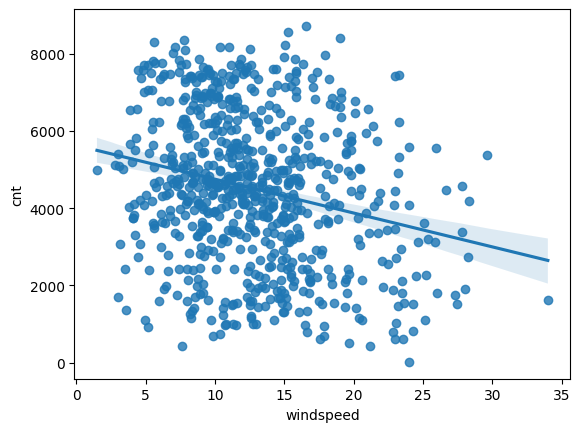

In [23]:
# Visualize the data given
sns.regplot(x='windspeed', y= 'cnt', data=data)

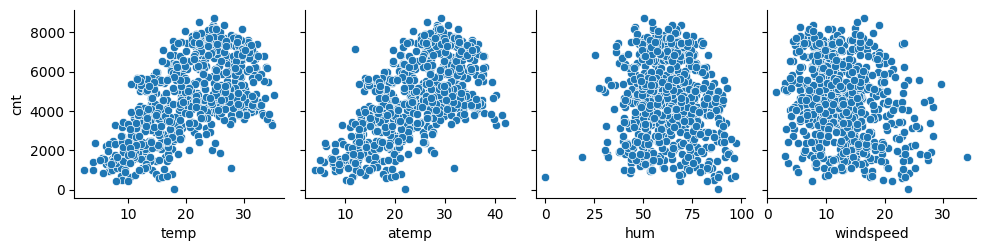

In [24]:
sns.pairplot(data=data, x_vars=['temp','atemp','hum','windspeed'], y_vars='cnt')#visualizing numeric variables

In [25]:
df=data[['atemp','temp','hum','windspeed','cnt']]

In [26]:
df.corr()# correlation between target variable('cnt') and independent variable

,atemp,temp,hum,windspeed,cnt
atemp,1.000000,0.991696,0.141512,-0.183876,0.630685
temp,0.991696,1.000000,0.128565,-0.158186,0.627044
hum,0.141512,0.128565,1.000000,-0.248506,-0.098543
windspeed,-0.183876,-0.158186,-0.248506,1.000000,-0.235132
cnt,0.630685,0.627044,-0.098543,-0.235132,1.000000


In [ ]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,mon,1,cloudy_day,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,tues,1,cloudy_day,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,wed,1,sunny_day,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,thurs,1,sunny_day,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,fri,1,sunny_day,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<Axes: >

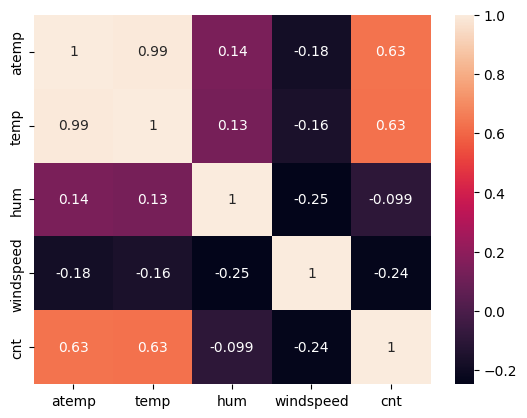

In [27]:
sns.heatmap(df.corr(),annot=True)# map shows 'temp' and 'atemp' have positive correlation to target variable
                                  #where as 'hum' and 'windspeed' have negative correlation to target variable

In [ ]:
#Visualizing categorical variable

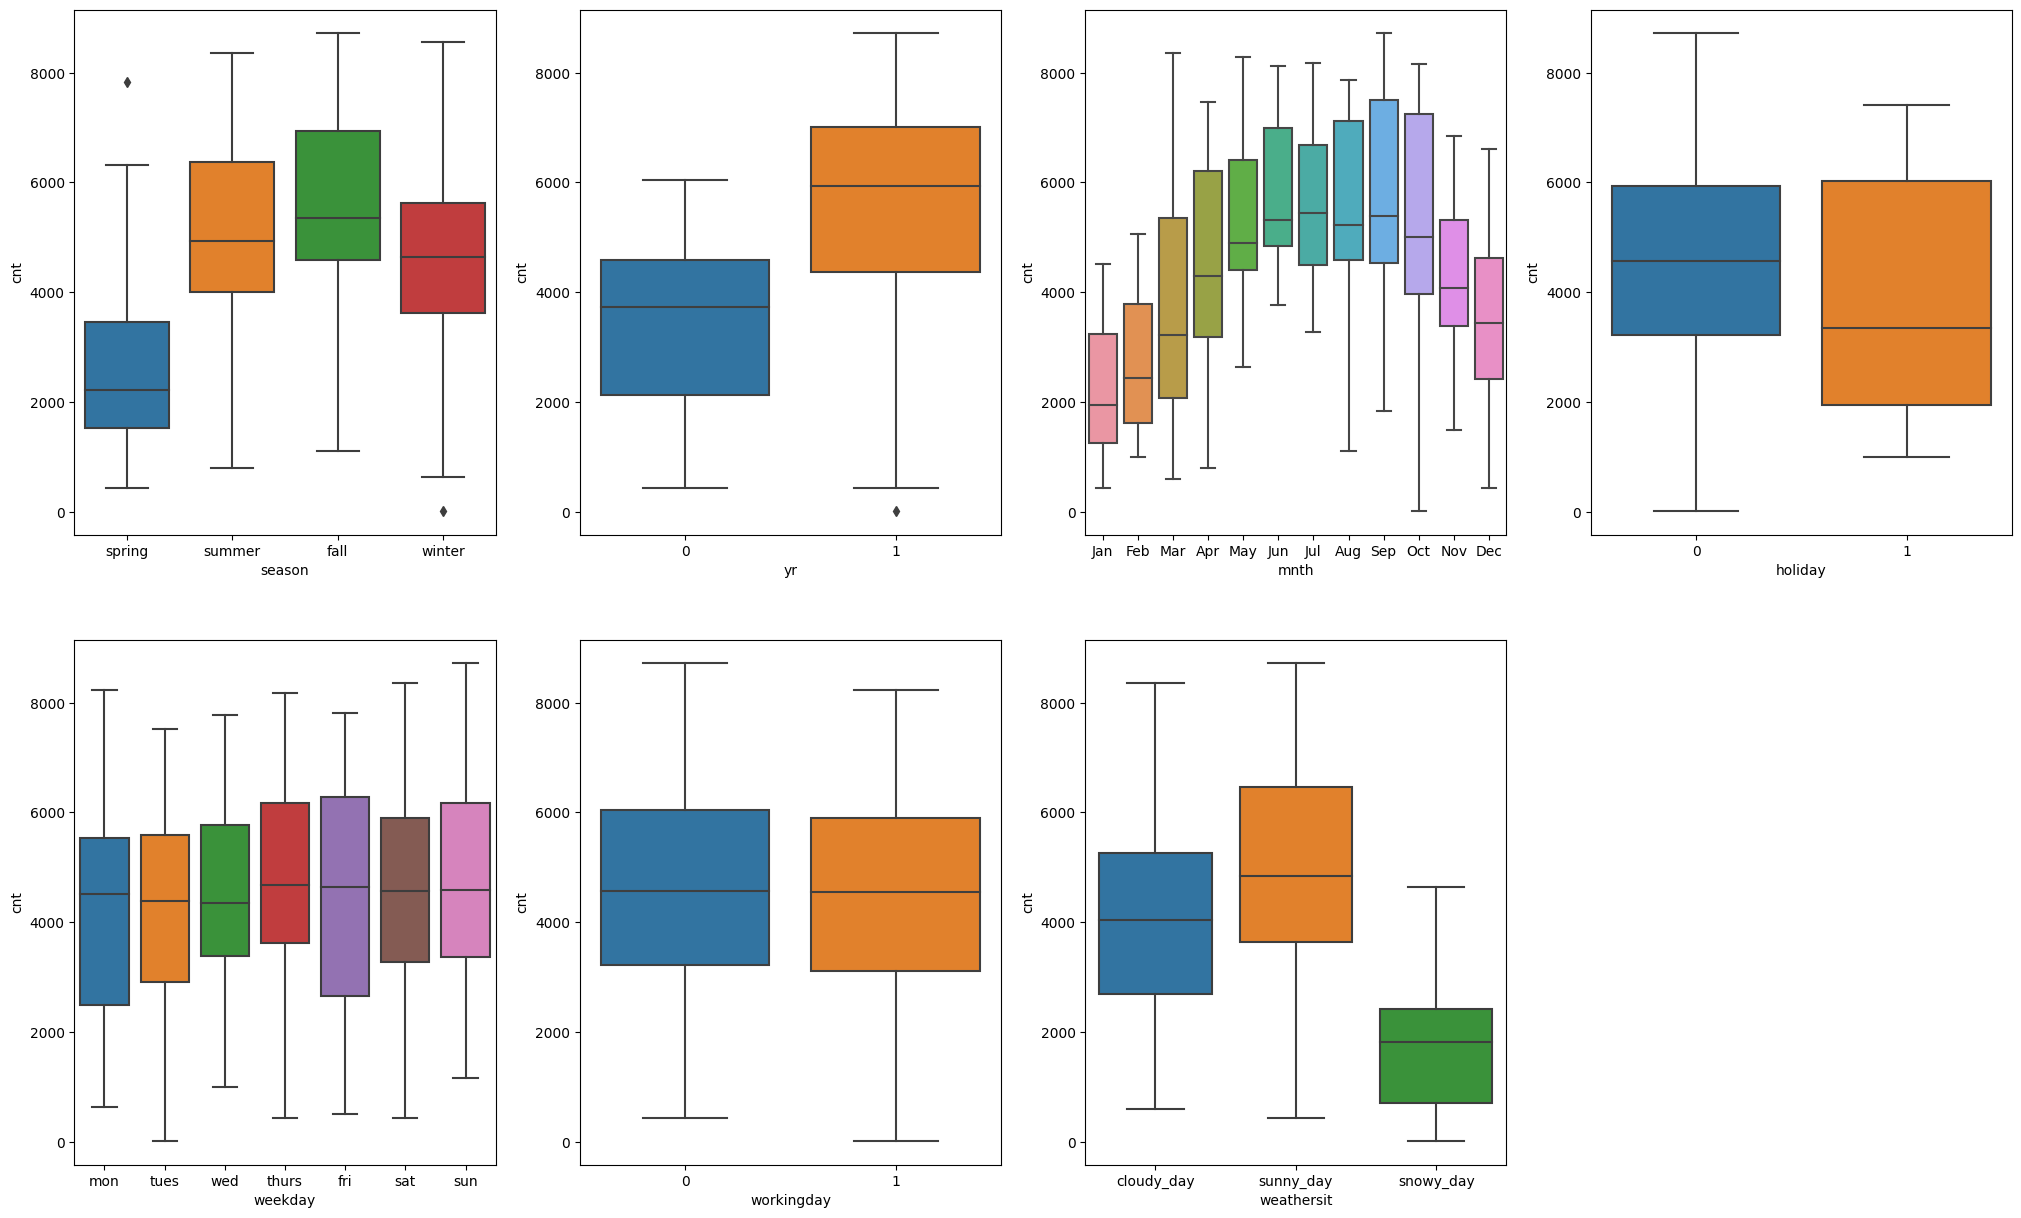

In [28]:
plt.figure(figsize=(25,15))
plt.subplot(2,4,1)
sns.boxplot(x='season',y='cnt',data=data)
plt.subplot(2,4,2)
sns.boxplot(x='yr',y='cnt',data=data)
plt.subplot(2,4,3)
sns.boxplot(x='mnth',y='cnt',data=data)
plt.subplot(2,4,4)
sns.boxplot(x='holiday',y='cnt',data=data)
plt.subplot(2,4,5)
sns.boxplot(x='weekday',y='cnt',data=data)
plt.subplot(2,4,6)
sns.boxplot(x='workingday',y='cnt',data=data)
plt.subplot(2,4,7)
sns.boxplot(x='weathersit',y='cnt',data=data)
plt.show()

In [29]:
# taking required data alone
req_data=data[['season','yr','mnth','holiday','weekday','workingday',
               'weathersit','temp','atemp','hum','windspeed','cnt']]

In [ ]:
req_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [30]:
req_data['season']=req_data['season'].astype('category')
req_data['weathersit']=req_data['weathersit'].astype('category')
req_data['weekday']=req_data['weekday'].astype('category')
req_data['mnth']=req_data['mnth'].astype('category')

<ipython-input-30-864d80c3f005>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  req_data['season']=req_data['season'].astype('category')
<ipython-input-30-864d80c3f005>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  req_data['weathersit']=req_data['weathersit'].astype('category')
<ipython-input-30-864d80c3f005>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

Creating dummy variables

In [31]:
req_data=pd.get_dummies(req_data,drop_first=True)

In [32]:
req_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   yr                    730 non-null    int64  
 1   holiday               730 non-null    int64  
 2   workingday            730 non-null    int64  
 3   temp                  730 non-null    float64
 4   atemp                 730 non-null    float64
 5   hum                   730 non-null    float64
 6   windspeed             730 non-null    float64
 7   cnt                   730 non-null    int64  
 8   season_spring         730 non-null    uint8  
 9   season_summer         730 non-null    uint8  
 10  season_winter         730 non-null    uint8  
 11  mnth_Aug              730 non-null    uint8  
 12  mnth_Dec              730 non-null    uint8  
 13  mnth_Feb              730 non-null    uint8  
 14  mnth_Jan              730 non-null    uint8  
 15  mnth_Jul              7

In [33]:
req_data.shape

(730, 30)

In [34]:
req_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed,weathersit_snowy_day,weathersit_sunny_day
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


Importing required libraries for train_test_split

In [35]:
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [36]:
#train_test split
np.random.seed(0)
data_train, data_test = train_test_split(req_data, train_size=0.7, random_state=333)

In [37]:
#scaling for numeric variables

scaler = MinMaxScaler()

vars = ['atemp','temp','hum','windspeed','cnt']

data_train[vars] = scaler.fit_transform(data_train[vars])

In [ ]:
data_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed,weathersit_snowy_day,weathersit_sunny_day
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0,0,1,...,1,0,0,0,1,0,0,0,0,1
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0,0,0,...,0,0,0,0,0,0,0,1,0,1
714,1,0,1,0.378013,0.381804,0.871429,0.161523,0,0,1,...,0,0,1,0,0,0,0,0,0,0
8,0,0,1,0.098690,0.048706,0.451083,0.700017,1,0,0,...,0,0,0,0,0,0,1,0,0,1
502,1,0,0,0.629300,0.619631,0.543723,0.235894,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 650 to 419
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   yr                    510 non-null    int64  
 1   holiday               510 non-null    int64  
 2   workingday            510 non-null    int64  
 3   temp                  510 non-null    float64
 4   atemp                 510 non-null    float64
 5   hum                   510 non-null    float64
 6   windspeed             510 non-null    float64
 7   cnt                   510 non-null    float64
 8   season_spring         510 non-null    uint8  
 9   season_summer         510 non-null    uint8  
 10  season_winter         510 non-null    uint8  
 11  mnth_Aug              510 non-null    uint8  
 12  mnth_Dec              510 non-null    uint8  
 13  mnth_Feb              510 non-null    uint8  
 14  mnth_Jan              510 non-null    uint8  
 15  mnth_Jul             

In [38]:
data_train.shape

(510, 30)

In [39]:
data_test.shape

(220, 30)

Visualization on training dataset

In [40]:
data_train1 = data_train[['temp','atemp','hum','windspeed','cnt']]

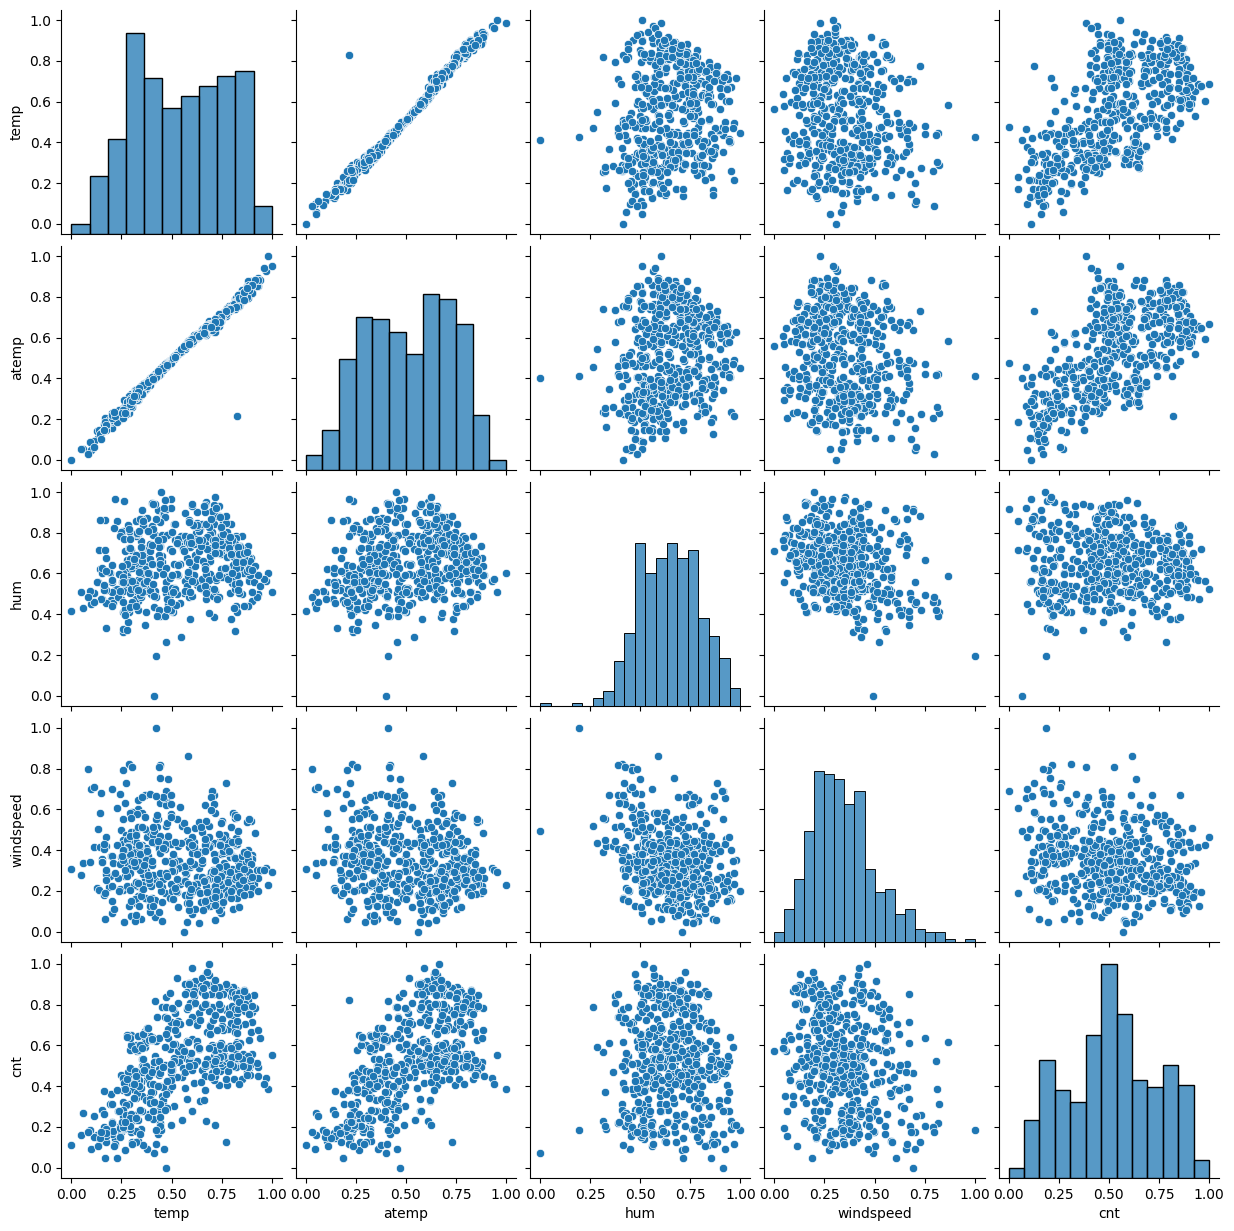

In [41]:
sns.pairplot(data_train1)
plt.show()

Creating Linear Model

In [42]:
y_train = data_train.pop('cnt')
X_train = data_train

In [43]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [44]:
rfe = RFE(lm,step=18)
rfe = rfe.fit(X_train,y_train)

In [45]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 2),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 2),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 2),
 ('mnth_Dec', False, 2),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', False, 2),
 ('mnth_Jul', False, 2),
 ('mnth_Jun', False, 2),
 ('mnth_Mar', False, 2),
 ('mnth_May', False, 2),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 2),
 ('mnth_Sep', True, 1),
 ('weekday_mon', False, 2),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thurs', False, 2),
 ('weekday_tues', False, 2),
 ('weekday_wed', False, 2),
 ('weathersit_snowy_day', True, 1),
 ('weathersit_sunny_day', True, 1)]

In [46]:
Tru = X_train.columns[rfe.support_]
Tru

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Nov', 'mnth_Sep', 'weekday_sat',
       'weekday_sun', 'weathersit_snowy_day', 'weathersit_sunny_day'],
      dtype='object')

In [48]:
Fal = X_train.columns[~rfe.support_]
Fal

Index(['holiday', 'season_summer', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Oct',
       'weekday_mon', 'weekday_thurs', 'weekday_tues', 'weekday_wed'],
      dtype='object')

Linear Model using Stats_Model

Model1

In [49]:
#Calculate Variance Inflation Factor
def VIF(Tru,X_train):
  vif = pd.DataFrame()
  vif['Features'] = Tru
  vif['VIF'] = [variance_inflation_factor(X_train[Tru].values, i) for i in range(X_train[Tru].shape[1])]
  vif['VIF'] = round(vif['VIF'],2)
  vif = vif.sort_values(by = 'VIF',ascending = False)
  display(vif)

In [50]:
X_train_rfe  = X_train[Tru]

In [51]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     173.0
Date:                Sat, 02 Dec 2023   Prob (F-statistic):          2.41e-180
Time:                        12:37:02   Log-Likelihood:                 491.87
No. Observations:                 510   AIC:                            -953.7
Df Residuals:                     495   BIC:                            -890.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2742 

In [52]:
lm.params

const                   0.274229
yr                      0.228702
workingday              0.044463
temp                    0.258099
atemp                   0.187915
hum                    -0.172925
windspeed              -0.171186
season_spring          -0.121115
season_winter           0.065208
mnth_Nov               -0.046028
mnth_Sep                0.071266
weekday_sat             0.071893
weekday_sun             0.064429
weathersit_snowy_day   -0.214326
weathersit_sunny_day    0.044839
dtype: float64

In [53]:
VIF(Tru,X_train)

,Features,VIF
3,atemp,355.48
2,temp,353.21
4,hum,24.27
1,workingday,21.21
5,windspeed,5.90
11,weekday_sun,5.05
10,weekday_sat,5.01
13,weathersit_sunny_day,3.67
6,season_spring,3.03
7,season_winter,2.63


MODEL 2

In [54]:
# Dropping atemp variable
X_train_new = X_train[Tru].drop(['atemp'],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm_2 = sm.OLS(y_train,X_train_lm).fit()

In [76]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     185.9
Date:                Sat, 02 Dec 2023   Prob (F-statistic):          4.22e-181
Time:                        12:42:24   Log-Likelihood:                 490.94
No. Observations:                 510   AIC:                            -953.9
Df Residuals:                     496   BIC:                            -894.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2768 

In [55]:
VIF(X_train_new.columns,X_train_new)

,Features,VIF
3,hum,24.08
1,workingday,21.11
2,temp,15.83
4,windspeed,5.73
10,weekday_sun,5.03
9,weekday_sat,5.01
12,weathersit_sunny_day,3.67
5,season_spring,3.03
6,season_winter,2.61
0,yr,2.04


Model 3

In [56]:
#Dropping hum variable
X_train_new = X_train[Tru].drop(['hum'],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm_3 = sm.OLS(y_train,X_train_lm).fit()

In [ ]:
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     177.9
Date:                Fri, 01 Dec 2023   Prob (F-statistic):          3.53e-177
Time:                        13:18:11   Log-Likelihood:                 481.62
No. Observations:                 510   AIC:                            -935.2
Df Residuals:                     496   BIC:                            -876.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1449 

In [57]:
VIF(X_train_new.columns,X_train_new)

,Features,VIF
2,temp,353.04
3,atemp,352.72
1,workingday,14.28
4,windspeed,5.89
10,weekday_sun,3.75
9,weekday_sat,3.68
12,weathersit_sunny_day,2.89
5,season_spring,2.72
6,season_winter,2.33
0,yr,2.04


Model 4

In [58]:
# Dropping temp variable
X_train_new = X_train[Tru].drop(['temp'],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm_4 = sm.OLS(y_train,X_train_lm).fit()

In [ ]:
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     185.0
Date:                Fri, 01 Dec 2023   Prob (F-statistic):          1.13e-180
Time:                        13:22:11   Log-Likelihood:                 489.93
No. Observations:                 510   AIC:                            -951.9
Df Residuals:                     496   BIC:                            -892.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2780 

In [59]:
VIF(X_train_new.columns,X_train_new)

,Features,VIF
3,hum,24.26
1,workingday,21.21
2,atemp,15.93
4,windspeed,5.70
10,weekday_sun,5.05
9,weekday_sat,5.01
12,weathersit_sunny_day,3.67
5,season_spring,2.97
6,season_winter,2.55
0,yr,2.04


Model 5

In [60]:
#Dropping workingday variable
X_train_new = X_train[Tru].drop(['workingday'],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm_5 = sm.OLS(y_train,X_train_lm).fit()

In [ ]:
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     185.7
Date:                Fri, 01 Dec 2023   Prob (F-statistic):          5.63e-181
Time:                        13:25:55   Log-Likelihood:                 490.65
No. Observations:                 510   AIC:                            -953.3
Df Residuals:                     496   BIC:                            -894.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3189 

In [61]:
VIF(X_train_new.columns,X_train_new)

,Features,VIF
2,atemp,353.80
1,temp,353.09
3,hum,16.34
4,windspeed,5.19
12,weathersit_sunny_day,3.25
5,season_spring,2.83
6,season_winter,2.60
0,yr,2.04
7,mnth_Nov,1.65
9,weekday_sat,1.21


Model 2 has R-square value as 0.830 and adjusted R-square value as 0.825.
And VIFs are less than 30 which is comparatively good.
Therefore, it is suggested to go ahead with this model.

RESIDUAL ANALYSIS

In [63]:
y_train_res = lm_2.predict(X_train_lm)

In [64]:
np.sqrt(mean_squared_error(y_train,y_train_res))

0.09644068941999956

<ipython-input-65-9af1b1e1864c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train-y_train_res),bins = 20)


Text(0.5, 0, 'Errors')

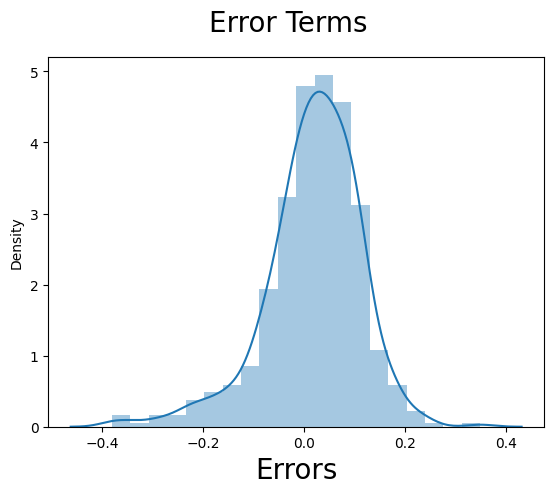

In [65]:
fig = plt.figure()
sns.distplot((y_train-y_train_res),bins = 20)
fig.suptitle('Error Terms', fontsize =20)
plt.xlabel('Errors', fontsize = 20)# residuals are normal

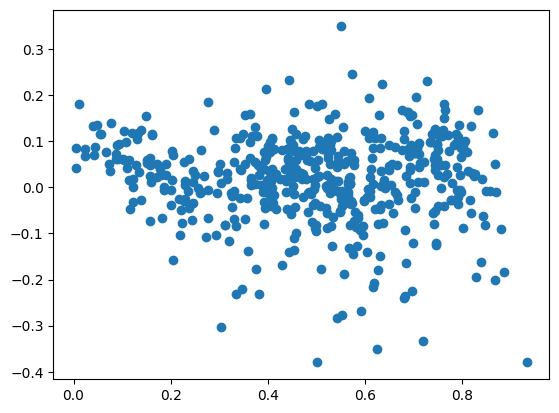

In [66]:
plt.scatter(y_train_res,(y_train-y_train_res))
plt.show()

PREDICTING VALUES

In [67]:
num_vars = ['atemp','temp','hum','windspeed','cnt']
data_test[num_vars] = scaler.transform(data_test[num_vars])

In [68]:
data_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed,weathersit_snowy_day,weathersit_sunny_day
22,0,0,1,0.046591,0.025950,0.453529,0.462217,0.110907,1,0,...,0,0,0,0,0,0,1,0,0,1
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,0,1,...,0,0,0,0,1,0,0,0,0,1
553,1,0,1,0.951196,0.933712,0.596104,0.212829,0.534975,0,0,...,0,0,1,0,0,0,0,0,0,1
504,1,0,1,0.699909,0.662746,0.551083,0.478229,0.817648,0,1,...,0,0,1,0,0,0,0,0,0,1
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,0,0,0,0,1,0,0,0,0


In [69]:
data_test.shape

(220, 30)

In [70]:
#Defining X_test and y_test
y_test = data_test.pop('cnt')
X_test = data_test

In [71]:
X_test_new = X_test[X_train_new.columns]

X_test_new = sm.add_constant(X_test_new)

In [72]:
y_pred = lm_2.predict(X_test_new)

In [73]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.10067896860903175

In [74]:
test_R = r2_score(y_test,y_pred)
test_R

0.7893877511168331

In [75]:
adj_test_R = 1-(1-test_R)*(220-1)/(220-12-1)
adj_test_R

0.7771783453844756

In [77]:
Output = pd.DataFrame({'Performance measures':['R_Squared Value','Adjusted R_Squared','RMSE'],
                       'Train Data':[0.830,0.825,0.096],
                       'Test Data':[0.789,0.777,0.101]})

In [78]:
print(Output)

  Performance measures  Train Data  Test Data
0      R_Squared Value       0.830      0.789
1   Adjusted R_Squared       0.825      0.777
2                 RMSE       0.096      0.101


In [79]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     185.9
Date:                Sat, 02 Dec 2023   Prob (F-statistic):          4.22e-181
Time:                        12:43:28   Log-Likelihood:                 490.94
No. Observations:                 510   AIC:                            -953.9
Df Residuals:                     496   BIC:                            -894.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2768 

INFERENCE:

On a Snowy day the bike hire was dropped by 0.2152 times.

If the windspeed is increased by one unit then bike hire is decreased by 0.1778 times.

A unit raise in humidity decreases the bike hire by 0.1705 times.

As the year increases the bike hire also increases but by 0.2288 times.

On spring season the bike hiring is decreased by 0.1214 times.